<a href="https://colab.research.google.com/github/jose-luis-hernandez-amaya/EDP-1-Ejercicios/blob/main/Series_de_Fourier%20Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

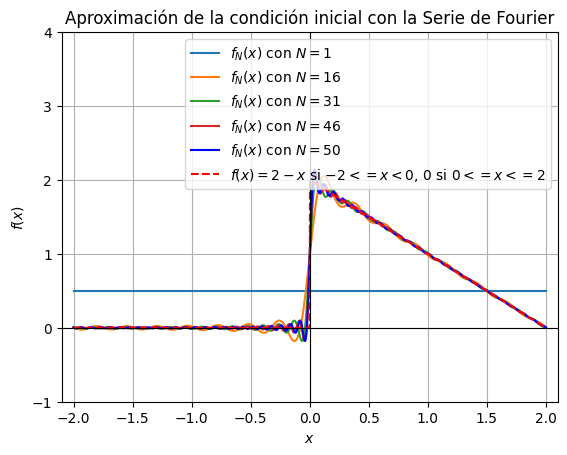

In [21]:
from pylab import *   # Importa las funciones principales de la librería PyLab (matplotlib y numpy, entre otros)
import matplotlib.pyplot as plt   # Importa la librería de gráficos de Matplotlib
import numpy as np   # Importa la librería de funciones numéricas de Numpy

# Crea un arreglo de 1000 puntos equidistantes en el intervalo de -2 a 2
x = np.linspace(-2, 2, 1000)

# Define una función por tramos f_exact. En el intervalo [-2, 0) es 0, y en [0, 2] es 2-x
f_exact = np.piecewise(x, [(-2 <= x) & (x < 0), (0 <= x) & (x <= 2)], [0, lambda x: 2-x])

# Define una función que calcula la aproximación de la condición inicial usando la Serie de Fourier.
# 'N' es el número de armónicos que se usan en la serie.
def u_0(x, N):  # N es el número de armónicos
    f = np.zeros(len(x))  # Inicializa el arreglo f con ceros del mismo tamaño que x
    for n in range(1, N):  # Bucle que recorre los primeros N armónicos
        # Calcula la contribución de cada armónico en la serie y la suma a 'f'
        f += ((-(2 * ((-1)**n - 1) )) * np.cos(n * np.pi * x / 2) / (n * np.pi)**2) + ((2 * np.sin(n * np.pi * x / 2)) / (n * np.pi))
    return 1 / 2 + f  # Devuelve el valor de la aproximación sumando 1/2 a la suma de los armónicos

# Calcula la aproximación usando 50 armónicos de la Serie de Fourier
f_n = u_0(x, N=50)

# Dibuja diferentes aproximaciones de la serie de Fourier para distintos valores de N (de 1 a 50)
for i in range(1, 50, 15):  # Recorre los valores de N (1, 16, 31, 46)
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)  # Calcula y grafica la serie de Fourier para cada valor de N

# Grafica la aproximación con N=50 en azul
plt.plot(x, f_n, label='$f_N(x)$ con $N=50$', color='blue')

# Grafica la función exacta f(x) en rojo, con línea discontinua
plt.plot(x, f_exact, label='$f(x)=2-x$ si $-2<= x < 0$, $0$ si $0<= x <= 2$', color='red', linestyle='--')

# Etiqueta el eje x
plt.xlabel('$x$')

# Etiqueta el eje y
plt.ylabel('$f(x)$')

# Título del gráfico
plt.title("Aproximación de la condición inicial con la Serie de Fourier")

# Dibuja una línea horizontal en el valor 0 para el eje x
plt.axhline(0, color='black', linewidth=0.8)

# Dibuja una línea vertical en el valor 0 para el eje y
plt.axvline(0, color='black', linewidth=0.8)

# Establece los límites del eje x para que se vean de -2.1 a 2.1
xlim([-2.1, 2.1])

# Establece los límites del eje y para que se vean de -1 a 4
ylim([-1, 4])

# Activa la cuadrícula en el gráfico
grid()

# Muestra la leyenda para identificar las curvas
legend()

# Muestra el gráfico
plt.show()
